In [40]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
import astropy.units as u
from astropy.cosmology import z_at_value, FlatLambdaCDM
from astropy import constants as const
from scipy.interpolate import interp1d

In [41]:
os.chdir("/home/benardorci/SimulationData")
os.getcwd()

'/home/benardorci/SimulationData'

In [42]:
Halos = np.load("/home/benardorci/SimulationData/halos.npy")
DMP = np.load("/home/benardorci/SimulationData/dm_cat_ds_100.npy")
CheckingEverythingIsAlright = 117

In [43]:
DMP = np.array(DMP)
DMPCopy = DMP.copy()

Radius = 400
HalfHeight = 0

DMP[:,1] = DMP[:,1] + Radius 
DMP[:,2] = DMP[:,2] + Radius 
DMP[:,3] = DMP[:,3] + HalfHeight

NewDMPBoxShell = []

for m, x, y, z, Vx, Vy, Vz in zip(DMPCopy[:,0], DMPCopy[:,1], DMPCopy[:,2], DMPCopy[:,3], DMPCopy[:,4], DMPCopy[:,5], DMPCopy[:,6]) :
    if  x < Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA  
            
        else :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
            
    elif  x > 1050-Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        else :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y < Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif z < HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #CARA             
                  
    elif z > 1050-HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #CARA
    
    else :
        continue

In [44]:
print(CheckingEverythingIsAlright)

117


In [45]:
NewDMPBox = np.concatenate((DMP, NewDMPBoxShell))

In [46]:
print(CheckingEverythingIsAlright)

117


In [47]:
IDMostMassiveHalo = np.argmax(Halos[:,0])

#np.argsor       orden de menor a mayor, ::-1 to reverse it

In [48]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

DistanceOfRS0dot3=cosmo.comoving_distance(0.3)
DistanceOfRS0dot3 = DistanceOfRS0dot3.value
print(DistanceOfRS0dot3,"MPC")

1194.3968697152304 MPC


In [49]:
#                             INTERPOLATION

MPCMin = z_at_value(cosmo.comoving_distance, 0.001*u.Mpc)
MPCMax = z_at_value(cosmo.comoving_distance, 3300*u.Mpc) # 1050 + 1200 + 1050, box + 0.3 RS + Shell (525 each side)
RSgrid = np.linspace(MPCMin, MPCMax, 50000)
MPCgrid = cosmo.comoving_distance(RSgrid)

MPCtoRSInterpolation = interp1d(MPCgrid, RSgrid)                #scipy.interpolate.UnivariateSpline

In [50]:
# New frame of reference (The Halo that was selected).

NewDMPBox[:,1] = NewDMPBox[:,1] - (Halos[IDMostMassiveHalo,1] + Radius)
NewDMPBox[:,2] = NewDMPBox[:,2] - (Halos[IDMostMassiveHalo,2] + Radius)
NewDMPBox[:,3] = NewDMPBox[:,3] - (Halos[IDMostMassiveHalo,3] + HalfHeight) + DistanceOfRS0dot3

# Redshift of the DMP.

DMPBoxRSandA = np.zeros((np.size(NewDMPBox[:,3]),2))
DMPBoxRSandA[:,0] = MPCtoRSInterpolation(NewDMPBox[:,3])
DMPBoxRSandA[:,0] = DMPBoxRSandA[:,0] + (NewDMPBox[:,6]/const.c.value)*(1/(1+DMPBoxRSandA[:,0]))

# Angles of the DMP.

DMPBoxRSandA[:,1] = np.arctan(np.sqrt(NewDMPBox[:,1]**2 + NewDMPBox[:,2]**2)/NewDMPBox[:,3]) 

# can also use arctan2 to get the cuadrant

In [51]:
Cylinder= []
Radians = np.radians(10)

for x,y in zip(DMPBoxRSandA[:,0], DMPBoxRSandA[:,1]) :
    if (0.2 <= x <= 0.5 and y <= Radians) :
        Cylinder.append([x, y])


Cylinder = np.array(Cylinder)

In [52]:
Cylinder[0,:]

array([0.38633294, 0.17322607])

In [53]:
np.size(Cylinder)

6966004

In [54]:
#np.savetxt("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.txt",FinalVelocities,fmt='%s')

In [55]:
print(CheckingEverythingIsAlright)

117


In [56]:
#np.save("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.npy",FinalVelocities)
#np.save("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.npy",FinalVelocities)

In [57]:
print(CheckingEverythingIsAlright)

117


In [58]:
#plt.hist(FinalVelocities, bins=100, histtype='bar', stacked=True)
#plt.savefig("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin#HistogramsDS1000.png")

In [59]:
print(CheckingEverythingIsAlright)

117


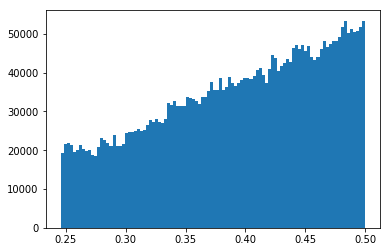

In [60]:
plt.hist(Cylinder[:,0], bins=100) #density=True
plt.show()
#plt.savefig("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.png")
#plt.savefig("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.png")

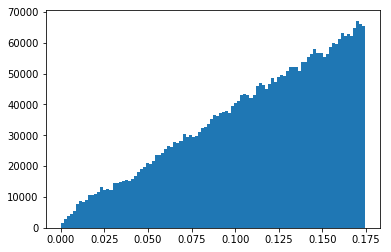

In [61]:
plt.hist(Cylinder[:,1], bins=100) #density=True
plt.show()

In [71]:
FinalVelocitys = const.c.value*(Cylinder[:,0]-0.3)/(1.3*1000)

In [72]:
V = []

for x in FinalVelocitys :
    if (-3000 <= x <= 3000) :
        V.append(x)

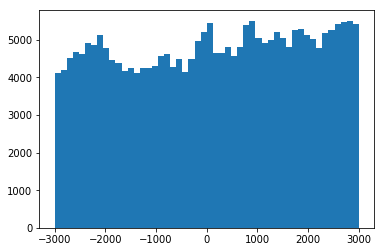

In [73]:
plt.hist(V, bins=50)
plt.show()

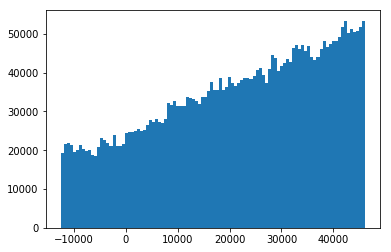

In [74]:
plt.hist(FinalVelocitys, bins=100)
plt.show()

In [69]:
print(np.radians(3))

0.05235987755982989


In [70]:
np.tan(np.radians(3))*2250

117.91750338684272